In [1]:
# import os
# %cd C:/Users/hp/ads_covid-19/

In [ ]:
# !conda install -c conda-forge prophet

# Forecasting - Facebook Prophet

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
from prophet import Prophet 

In [4]:
%matplotlib inline
plt.style.use('fivethirtyeight') 

# Trivial Forecast (rolling mean)

In [5]:
df = pd.DataFrame({'X': np.arange(0,10)}) # generate an input df
df['y']=df.rolling(3).mean()              # take the window and write the average as the result

In [6]:
df

,X,y
0,0,NaN
1,1,NaN
2,2,1.0
3,3,2.0
4,4,3.0
5,5,4.0
6,6,5.0
7,7,6.0
8,8,7.0
9,9,8.0


# Small Data Set

In [7]:
df_all = pd.read_csv('C:\\Users\\hp\\ads_covid-19\\data\\processed\\COVID_small_flat_table.csv',sep=';')
df=df_all[['date','Germany']]
df=df.rename(columns={'date': 'ds',
                        'Germany': 'y'})

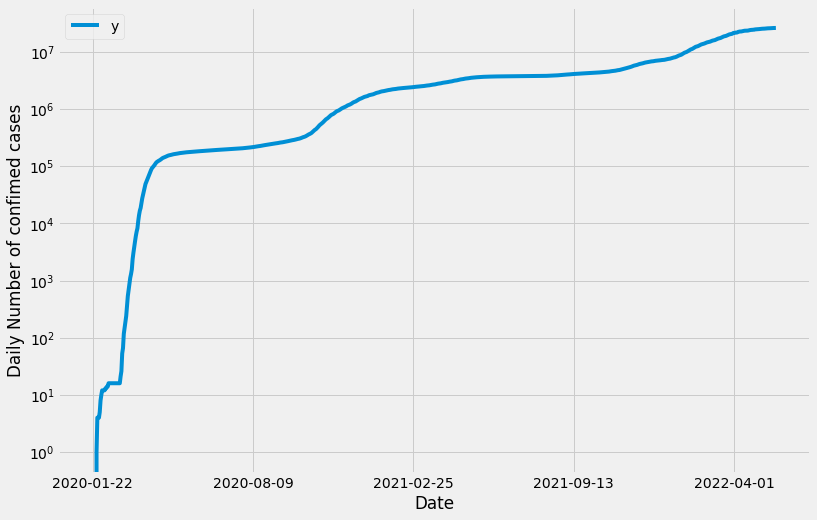

In [8]:
ax = df.set_index('ds').plot(figsize=(12, 8),logy=True)
                           
ax.set_ylabel('Daily Number of confimed cases')
ax.set_xlabel('Date')

plt.show()

In [19]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)   # logistic model

In [20]:
# the column 'cap' is only mandatory for the logistic model
df['cap']=1000000
my_model.fit(df)

23:33:11 - cmdstanpy - INFO - Chain [1] start processing
23:33:14 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
# define the periods and the frequency 'D'== days

future_dates = my_model.make_future_dataframe(periods=7, freq='D')
future_dates['cap']=1000000. # only mandatory for the logistic model
future_dates.tail()

,ds,cap
855,2022-05-26,1000000.0
856,2022-05-27,1000000.0
857,2022-05-28,1000000.0
858,2022-05-29,1000000.0
859,2022-05-30,1000000.0


In [22]:
forecast = my_model.predict(future_dates)

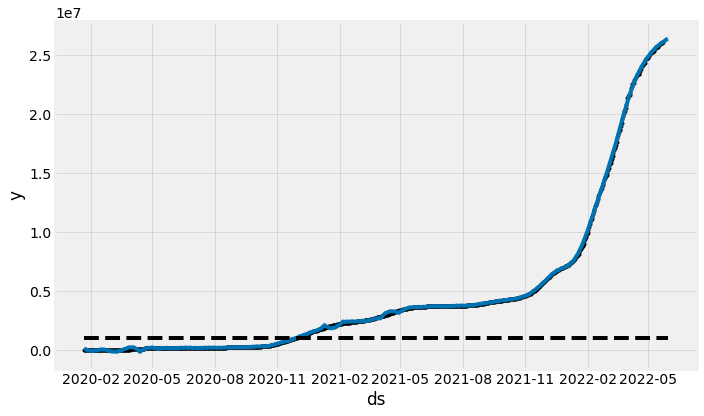

In [23]:
my_model.plot(forecast,
              uncertainty=True ); # since fbprohet is rendering the output

In [24]:
import plotly.offline as py
from prophet.plot import plot_plotly

fig = plot_plotly(my_model, forecast)  # This returns a plotly Figure

fig.update_layout(
    width=1024,
    height=900,
    xaxis_title="Time",
    yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
)
fig.update_yaxes(type="log",range=[1.1,5.5])
py.iplot(fig)

In [25]:
forecast.sort_values(by='ds').head()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,4.346239e+06,1000000.0,-119.167790,271733.535454,4.346239e+06,4.346239e+06,-4.210072e+06,-4.210072e+06,-4.210072e+06,-5721.098288,-5721.098288,-5721.098288,-4.204351e+06,-4.204351e+06,-4.204351e+06,0.0,0.0,0.0,136166.893984
1,2020-01-23,4.260351e+06,1000000.0,-35301.926794,243590.179341,4.260351e+06,4.260351e+06,-4.148309e+06,-4.148309e+06,-4.148309e+06,7152.511592,7152.511592,7152.511592,-4.155462e+06,-4.155462e+06,-4.155462e+06,0.0,0.0,0.0,112041.416745
2,2020-01-24,4.174463e+06,1000000.0,-48746.415415,205758.562713,4.174463e+06,4.174463e+06,-4.089579e+06,-4.089579e+06,-4.089579e+06,12599.890379,12599.890379,12599.890379,-4.102179e+06,-4.102179e+06,-4.102179e+06,0.0,0.0,0.0,84883.897629
3,2020-01-25,4.088575e+06,1000000.0,-88075.999568,194753.081859,4.088575e+06,4.088575e+06,-4.032632e+06,-4.032632e+06,-4.032632e+06,12051.431833,12051.431833,12051.431833,-4.044683e+06,-4.044683e+06,-4.044683e+06,0.0,0.0,0.0,55943.095718
4,2020-01-26,4.002687e+06,1000000.0,-140161.789482,165231.809255,4.002687e+06,4.002687e+06,-3.982560e+06,-3.982560e+06,-3.982560e+06,606.240735,606.240735,606.240735,-3.983166e+06,-3.983166e+06,-3.983166e+06,0.0,0.0,0.0,20126.909393


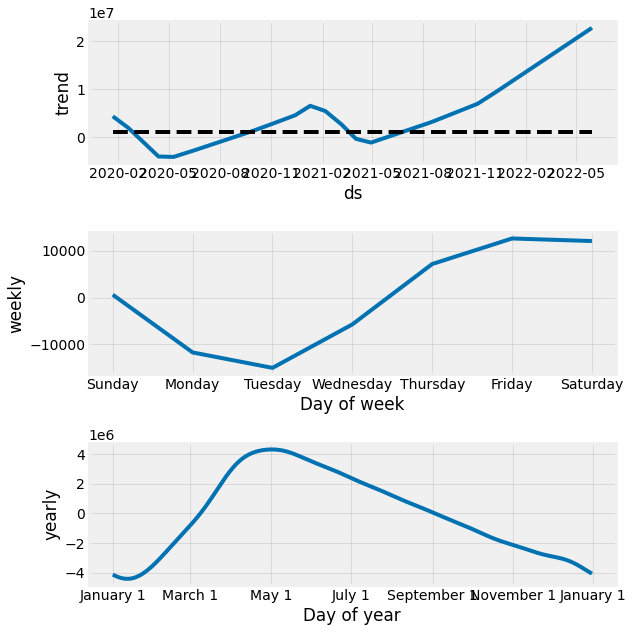

In [26]:
my_model.plot_components(forecast);

<AxesSubplot:xlabel='ds'>

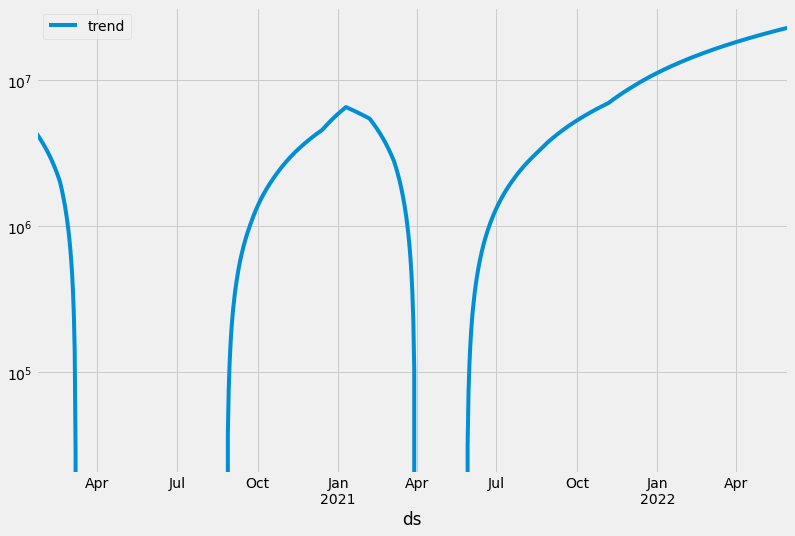

In [27]:
forecast[['ds','trend']].set_index('ds').plot(figsize=(12, 8),logy=True)

# Cross-Validation

In [29]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(my_model, 
                         initial='40 days',   # we take the first 30 days for training
                         period='1 days',     # every  days a new prediction run
                         horizon = '7 days')  # we predict 7 days into the future

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/806 [00:00<?, ?it/s]

23:39:36 - cmdstanpy - INFO - Chain [1] start processing
23:39:36 - cmdstanpy - INFO - Chain [1] done processing
23:39:39 - cmdstanpy - INFO - Chain [1] start processing
23:39:39 - cmdstanpy - INFO - Chain [1] done processing
23:39:42 - cmdstanpy - INFO - Chain [1] start processing
23:39:42 - cmdstanpy - INFO - Chain [1] done processing
23:39:45 - cmdstanpy - INFO - Chain [1] start processing
23:39:45 - cmdstanpy - INFO - Chain [1] done processing
23:39:48 - cmdstanpy - INFO - Chain [1] start processing
23:39:48 - cmdstanpy - INFO - Chain [1] done processing
23:39:51 - cmdstanpy - INFO - Chain [1] start processing
23:39:51 - cmdstanpy - INFO - Chain [1] done processing
23:39:54 - cmdstanpy - INFO - Chain [1] start processing
23:39:54 - cmdstanpy - INFO - Chain [1] done processing
23:39:57 - cmdstanpy - INFO - Chain [1] start processing
23:39:57 - cmdstanpy - INFO - Chain [1] done processing
23:40:00 - cmdstanpy - INFO - Chain [1] start processing
23:40:00 - cmdstanpy - INFO - Chain [1]

23:42:52 - cmdstanpy - INFO - Chain [1] done processing
23:42:54 - cmdstanpy - INFO - Chain [1] start processing
23:42:54 - cmdstanpy - INFO - Chain [1] done processing
23:42:56 - cmdstanpy - INFO - Chain [1] start processing
23:42:56 - cmdstanpy - INFO - Chain [1] done processing
23:42:58 - cmdstanpy - INFO - Chain [1] start processing
23:42:58 - cmdstanpy - INFO - Chain [1] done processing
23:43:00 - cmdstanpy - INFO - Chain [1] start processing
23:43:00 - cmdstanpy - INFO - Chain [1] done processing
23:43:04 - cmdstanpy - INFO - Chain [1] start processing
23:43:04 - cmdstanpy - INFO - Chain [1] done processing
23:43:06 - cmdstanpy - INFO - Chain [1] start processing
23:43:06 - cmdstanpy - INFO - Chain [1] done processing
23:43:10 - cmdstanpy - INFO - Chain [1] start processing
23:43:11 - cmdstanpy - INFO - Chain [1] done processing
23:43:14 - cmdstanpy - INFO - Chain [1] start processing
23:43:15 - cmdstanpy - INFO - Chain [1] done processing
23:43:19 - cmdstanpy - INFO - Chain [1] 

23:46:46 - cmdstanpy - INFO - Chain [1] done processing
23:46:48 - cmdstanpy - INFO - Chain [1] start processing
23:46:49 - cmdstanpy - INFO - Chain [1] done processing
23:46:51 - cmdstanpy - INFO - Chain [1] start processing
23:46:51 - cmdstanpy - INFO - Chain [1] done processing
23:46:54 - cmdstanpy - INFO - Chain [1] start processing
23:46:54 - cmdstanpy - INFO - Chain [1] done processing
23:46:57 - cmdstanpy - INFO - Chain [1] start processing
23:46:57 - cmdstanpy - INFO - Chain [1] done processing
23:46:59 - cmdstanpy - INFO - Chain [1] start processing
23:47:00 - cmdstanpy - INFO - Chain [1] done processing
23:47:02 - cmdstanpy - INFO - Chain [1] start processing
23:47:03 - cmdstanpy - INFO - Chain [1] done processing
23:47:05 - cmdstanpy - INFO - Chain [1] start processing
23:47:06 - cmdstanpy - INFO - Chain [1] done processing
23:47:08 - cmdstanpy - INFO - Chain [1] start processing
23:47:09 - cmdstanpy - INFO - Chain [1] done processing
23:47:11 - cmdstanpy - INFO - Chain [1] 

23:50:21 - cmdstanpy - INFO - Chain [1] done processing
23:50:24 - cmdstanpy - INFO - Chain [1] start processing
23:50:24 - cmdstanpy - INFO - Chain [1] done processing
23:50:27 - cmdstanpy - INFO - Chain [1] start processing
23:50:27 - cmdstanpy - INFO - Chain [1] done processing
23:50:30 - cmdstanpy - INFO - Chain [1] start processing
23:50:30 - cmdstanpy - INFO - Chain [1] done processing
23:50:33 - cmdstanpy - INFO - Chain [1] start processing
23:50:33 - cmdstanpy - INFO - Chain [1] done processing
23:50:35 - cmdstanpy - INFO - Chain [1] start processing
23:50:36 - cmdstanpy - INFO - Chain [1] done processing
23:50:39 - cmdstanpy - INFO - Chain [1] start processing
23:50:39 - cmdstanpy - INFO - Chain [1] done processing
23:50:42 - cmdstanpy - INFO - Chain [1] start processing
23:50:42 - cmdstanpy - INFO - Chain [1] done processing
23:50:45 - cmdstanpy - INFO - Chain [1] start processing
23:50:45 - cmdstanpy - INFO - Chain [1] done processing
23:50:48 - cmdstanpy - INFO - Chain [1] 

23:53:59 - cmdstanpy - INFO - Chain [1] done processing
23:54:02 - cmdstanpy - INFO - Chain [1] start processing
23:54:02 - cmdstanpy - INFO - Chain [1] done processing
23:54:05 - cmdstanpy - INFO - Chain [1] start processing
23:54:05 - cmdstanpy - INFO - Chain [1] done processing
23:54:07 - cmdstanpy - INFO - Chain [1] start processing
23:54:08 - cmdstanpy - INFO - Chain [1] done processing
23:54:11 - cmdstanpy - INFO - Chain [1] start processing
23:54:12 - cmdstanpy - INFO - Chain [1] done processing
23:54:15 - cmdstanpy - INFO - Chain [1] start processing
23:54:16 - cmdstanpy - INFO - Chain [1] done processing
23:54:18 - cmdstanpy - INFO - Chain [1] start processing
23:54:19 - cmdstanpy - INFO - Chain [1] done processing
23:54:22 - cmdstanpy - INFO - Chain [1] start processing
23:54:22 - cmdstanpy - INFO - Chain [1] done processing
23:54:24 - cmdstanpy - INFO - Chain [1] start processing
23:54:25 - cmdstanpy - INFO - Chain [1] done processing
23:54:27 - cmdstanpy - INFO - Chain [1] 

23:57:50 - cmdstanpy - INFO - Chain [1] done processing
23:57:52 - cmdstanpy - INFO - Chain [1] start processing
23:57:53 - cmdstanpy - INFO - Chain [1] done processing
23:57:55 - cmdstanpy - INFO - Chain [1] start processing
23:57:56 - cmdstanpy - INFO - Chain [1] done processing
23:57:58 - cmdstanpy - INFO - Chain [1] start processing
23:57:59 - cmdstanpy - INFO - Chain [1] done processing
23:58:01 - cmdstanpy - INFO - Chain [1] start processing
23:58:02 - cmdstanpy - INFO - Chain [1] done processing
23:58:05 - cmdstanpy - INFO - Chain [1] start processing
23:58:05 - cmdstanpy - INFO - Chain [1] done processing
23:58:08 - cmdstanpy - INFO - Chain [1] start processing
23:58:08 - cmdstanpy - INFO - Chain [1] done processing
23:58:11 - cmdstanpy - INFO - Chain [1] start processing
23:58:12 - cmdstanpy - INFO - Chain [1] done processing
23:58:14 - cmdstanpy - INFO - Chain [1] start processing
23:58:15 - cmdstanpy - INFO - Chain [1] done processing
23:58:17 - cmdstanpy - INFO - Chain [1] 

00:01:36 - cmdstanpy - INFO - Chain [1] done processing
00:01:38 - cmdstanpy - INFO - Chain [1] start processing
00:01:39 - cmdstanpy - INFO - Chain [1] done processing
00:01:41 - cmdstanpy - INFO - Chain [1] start processing
00:01:42 - cmdstanpy - INFO - Chain [1] done processing
00:01:45 - cmdstanpy - INFO - Chain [1] start processing
00:01:45 - cmdstanpy - INFO - Chain [1] done processing
00:01:48 - cmdstanpy - INFO - Chain [1] start processing
00:01:49 - cmdstanpy - INFO - Chain [1] done processing
00:01:51 - cmdstanpy - INFO - Chain [1] start processing
00:01:52 - cmdstanpy - INFO - Chain [1] done processing
00:01:54 - cmdstanpy - INFO - Chain [1] start processing
00:01:55 - cmdstanpy - INFO - Chain [1] done processing
00:01:58 - cmdstanpy - INFO - Chain [1] start processing
00:01:58 - cmdstanpy - INFO - Chain [1] done processing
00:02:01 - cmdstanpy - INFO - Chain [1] start processing
00:02:02 - cmdstanpy - INFO - Chain [1] done processing
00:02:05 - cmdstanpy - INFO - Chain [1] 

00:05:20 - cmdstanpy - INFO - Chain [1] done processing
00:05:22 - cmdstanpy - INFO - Chain [1] start processing
00:05:23 - cmdstanpy - INFO - Chain [1] done processing
00:05:25 - cmdstanpy - INFO - Chain [1] start processing
00:05:26 - cmdstanpy - INFO - Chain [1] done processing
00:05:28 - cmdstanpy - INFO - Chain [1] start processing
00:05:29 - cmdstanpy - INFO - Chain [1] done processing
00:05:31 - cmdstanpy - INFO - Chain [1] start processing
00:05:32 - cmdstanpy - INFO - Chain [1] done processing
00:05:34 - cmdstanpy - INFO - Chain [1] start processing
00:05:35 - cmdstanpy - INFO - Chain [1] done processing
00:05:37 - cmdstanpy - INFO - Chain [1] start processing
00:05:38 - cmdstanpy - INFO - Chain [1] done processing
00:05:39 - cmdstanpy - INFO - Chain [1] start processing
00:05:40 - cmdstanpy - INFO - Chain [1] done processing
00:05:42 - cmdstanpy - INFO - Chain [1] start processing
00:05:43 - cmdstanpy - INFO - Chain [1] done processing
00:05:45 - cmdstanpy - INFO - Chain [1] 

00:08:51 - cmdstanpy - INFO - Chain [1] done processing
00:08:53 - cmdstanpy - INFO - Chain [1] start processing
00:08:54 - cmdstanpy - INFO - Chain [1] done processing
00:08:56 - cmdstanpy - INFO - Chain [1] start processing
00:08:57 - cmdstanpy - INFO - Chain [1] done processing
00:08:59 - cmdstanpy - INFO - Chain [1] start processing
00:09:00 - cmdstanpy - INFO - Chain [1] done processing
00:09:02 - cmdstanpy - INFO - Chain [1] start processing
00:09:03 - cmdstanpy - INFO - Chain [1] done processing
00:09:05 - cmdstanpy - INFO - Chain [1] start processing
00:09:06 - cmdstanpy - INFO - Chain [1] done processing
00:09:08 - cmdstanpy - INFO - Chain [1] start processing
00:09:09 - cmdstanpy - INFO - Chain [1] done processing
00:09:11 - cmdstanpy - INFO - Chain [1] start processing
00:09:12 - cmdstanpy - INFO - Chain [1] done processing
00:09:14 - cmdstanpy - INFO - Chain [1] start processing
00:09:15 - cmdstanpy - INFO - Chain [1] done processing
00:09:17 - cmdstanpy - INFO - Chain [1] 

00:12:40 - cmdstanpy - INFO - Chain [1] done processing
00:12:42 - cmdstanpy - INFO - Chain [1] start processing
00:12:43 - cmdstanpy - INFO - Chain [1] done processing
00:12:46 - cmdstanpy - INFO - Chain [1] start processing
00:12:47 - cmdstanpy - INFO - Chain [1] done processing
00:12:49 - cmdstanpy - INFO - Chain [1] start processing
00:12:50 - cmdstanpy - INFO - Chain [1] done processing
00:12:52 - cmdstanpy - INFO - Chain [1] start processing
00:12:53 - cmdstanpy - INFO - Chain [1] done processing
00:12:55 - cmdstanpy - INFO - Chain [1] start processing
00:12:56 - cmdstanpy - INFO - Chain [1] done processing
00:12:58 - cmdstanpy - INFO - Chain [1] start processing
00:13:00 - cmdstanpy - INFO - Chain [1] done processing
00:13:02 - cmdstanpy - INFO - Chain [1] start processing
00:13:03 - cmdstanpy - INFO - Chain [1] done processing
00:13:05 - cmdstanpy - INFO - Chain [1] start processing
00:13:05 - cmdstanpy - INFO - Chain [1] done processing
00:13:07 - cmdstanpy - INFO - Chain [1] 

00:16:25 - cmdstanpy - INFO - Chain [1] done processing
00:16:27 - cmdstanpy - INFO - Chain [1] start processing
00:16:28 - cmdstanpy - INFO - Chain [1] done processing
00:16:30 - cmdstanpy - INFO - Chain [1] start processing
00:16:31 - cmdstanpy - INFO - Chain [1] done processing
00:16:33 - cmdstanpy - INFO - Chain [1] start processing
00:16:34 - cmdstanpy - INFO - Chain [1] done processing
00:16:35 - cmdstanpy - INFO - Chain [1] start processing
00:16:37 - cmdstanpy - INFO - Chain [1] done processing
00:16:39 - cmdstanpy - INFO - Chain [1] start processing
00:16:40 - cmdstanpy - INFO - Chain [1] done processing
00:16:42 - cmdstanpy - INFO - Chain [1] start processing
00:16:43 - cmdstanpy - INFO - Chain [1] done processing
00:16:45 - cmdstanpy - INFO - Chain [1] start processing
00:16:46 - cmdstanpy - INFO - Chain [1] done processing
00:16:48 - cmdstanpy - INFO - Chain [1] start processing
00:16:49 - cmdstanpy - INFO - Chain [1] done processing
00:16:51 - cmdstanpy - INFO - Chain [1] 

00:20:15 - cmdstanpy - INFO - Chain [1] done processing
00:20:18 - cmdstanpy - INFO - Chain [1] start processing
00:20:19 - cmdstanpy - INFO - Chain [1] done processing
00:20:22 - cmdstanpy - INFO - Chain [1] start processing
00:20:23 - cmdstanpy - INFO - Chain [1] done processing
00:20:25 - cmdstanpy - INFO - Chain [1] start processing
00:20:27 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-03-03,213.489050,209.101804,218.132425,188,2020-03-02
1,2020-03-04,289.959862,285.431607,294.343305,240,2020-03-02
2,2020-03-05,385.607248,381.089384,390.211029,349,2020-03-02
3,2020-03-06,506.122109,501.735485,510.740950,534,2020-03-02
4,2020-03-07,647.355236,642.621824,651.680261,684,2020-03-02


In [32]:
df_cv.sort_values(by=['cutoff','ds'])[0:14]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-03-03,213.489050,209.101804,218.132425,188,2020-03-02
1,2020-03-04,289.959862,285.431607,294.343305,240,2020-03-02
2,2020-03-05,385.607248,381.089384,390.211029,349,2020-03-02
3,2020-03-06,506.122109,501.735485,510.740950,534,2020-03-02
4,2020-03-07,647.355236,642.621824,651.680261,684,2020-03-02
5,2020-03-08,819.576384,815.281280,823.931423,847,2020-03-02
6,2020-03-09,1014.878918,1010.623369,1019.420823,1112,2020-03-02
7,2020-03-04,256.344475,250.692203,262.288081,240,2020-03-03
8,2020-03-05,331.589221,325.300008,337.956276,349,2020-03-03
9,2020-03-06,424.257004,418.815778,430.733163,534,2020-03-03


In [34]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)

In [35]:
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,6.583819e+09,81140.735686,32700.101041,0.006748,0.002606,0.006810,0.526055
1,2 days,9.210580e+09,95971.765937,39270.261268,0.009990,0.004098,0.010150,0.400744
2,3 days,1.236575e+10,111201.372639,46099.231606,0.012829,0.005143,0.013131,0.337469
3,4 days,1.613504e+10,127023.781186,53188.141304,0.016131,0.006364,0.016585,0.305211
4,5 days,2.082283e+10,144301.193491,60830.891355,0.019624,0.007479,0.020342,0.286600
5,6 days,2.664543e+10,163234.281483,69360.383616,0.023826,0.009267,0.024926,0.269231
6,7 days,3.387512e+10,184051.949723,79047.806969,0.029652,0.011392,0.031347,0.260546


C:\Users\hp\anaconda3\envs\p3workshop\lib\site-packages\prophet\plot.py:544: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

C:\Users\hp\anaconda3\envs\p3workshop\lib\site-packages\prophet\plot.py:545: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



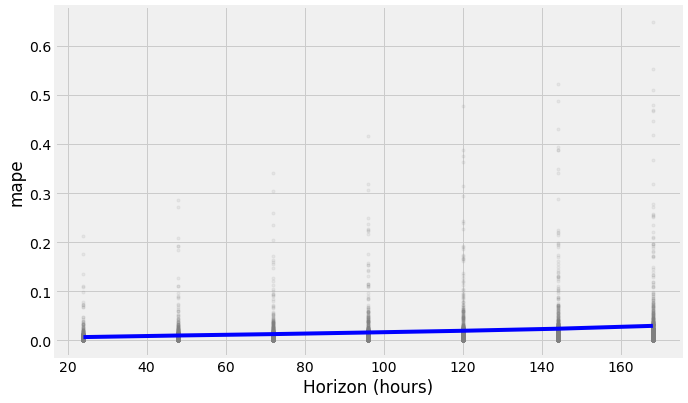

In [37]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape',)

# Diagonalplot

In [38]:
horizon='7 days'
df_cv['horizon']=df_cv.ds-df_cv.cutoff

date_vec=df_cv[df_cv['horizon']==horizon]['ds']
y_hat=df_cv[df_cv['horizon']==horizon]['yhat']
y=df_cv[df_cv['horizon']==horizon]['y']

In [39]:
df_cv_7=df_cv[df_cv['horizon']==horizon]
df_cv_7.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,horizon
5613,2022-05-19,2.610674e+07,2.592486e+07,2.628058e+07,25998085,2022-05-12,7 days
5620,2022-05-20,2.616466e+07,2.598625e+07,2.634660e+07,26040460,2022-05-13,7 days
5627,2022-05-21,2.618932e+07,2.601200e+07,2.636218e+07,26044283,2022-05-14,7 days
5634,2022-05-22,2.620483e+07,2.603209e+07,2.637007e+07,26045528,2022-05-15,7 days
5641,2022-05-23,2.623718e+07,2.607475e+07,2.641585e+07,26109965,2022-05-16,7 days


In [40]:
type(df_cv['horizon'][0])

pandas._libs.tslibs.timedeltas.Timedelta

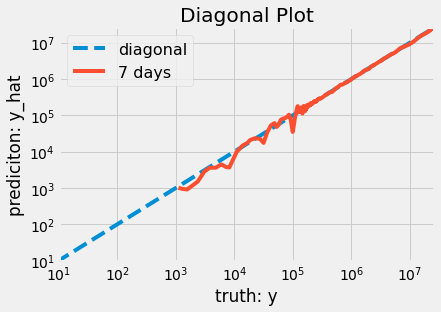

In [44]:
fig, ax = plt.subplots(1, 1)


ax.plot(np.arange(max(y)),np.arange(max(y)),'--',label='diagonal')
ax.plot(y,y_hat,'-',label=horizon)  # horizon is a np.timedelta objct

ax.set_title('Diagonal Plot')
ax.set_ylim(10, max(y))

ax.set_xlabel('truth: y')
ax.set_ylabel('prediciton: y_hat')
ax.set_yscale('log')

ax.set_xlim(10, max(y))
ax.set_xscale('log')
ax.legend(loc='best',
           prop={'size': 16});

# Trivial Forecast

In [46]:
def mean_absolute_percentage_error(y_true, y_pred): 
    ''' MAPE calculation '''
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [47]:
parse_dates=['date']
df_all = pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';',parse_dates=parse_dates)
df_trivial=df_all[['date','Germany']]
df_trivial=df_trivial.rename(columns={'date': 'ds',
                        'Germany': 'y'})

In [49]:
df_trivial['y_mean_r3']=df_trivial.y.rolling(3).mean() # take the average of 3 days

In [50]:
# the result has to be shifted according to the prediciton horizon (here 7 days)

df_trivial['cutoff']=df_trivial['ds'].shift(7)
df_trivial['y_hat']=df_trivial['y_mean_r3'].shift(7)
df_trivial['horizon']=df_trivial['ds']-df_trivial['cutoff']
print('MAPE: '+str(mean_absolute_percentage_error(df_trivial['y_hat'].iloc[12:,], df_trivial['y'].iloc[12:,])))
df_trivial

MAPE: 37.91573158284657


,ds,y,cutoff,y_mean_r3,y_hat,horizon
0,2020-01-22,0,NaT,NaN,NaN,NaT
1,2020-01-23,0,NaT,NaN,NaN,NaT
2,2020-01-24,0,NaT,0.000000e+00,NaN,NaT
3,2020-01-25,0,NaT,0.000000e+00,NaN,NaT
4,2020-01-26,0,NaT,0.000000e+00,NaN,NaT
...,...,...,...,...,...,...
848,2022-05-19,25998085,2022-05-12,2.594591e+07,2.558618e+07,7 days
849,2022-05-20,26040460,2022-05-13,2.599591e+07,2.565946e+07,7 days
850,2022-05-21,26044283,2022-05-14,2.602761e+07,2.570513e+07,7 days
851,2022-05-22,26045528,2022-05-15,2.604342e+07,2.572857e+07,7 days
